<a href="https://colab.research.google.com/github/kowsiknd/rock-paper-scissor-model/blob/main/Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import os
DIR = '/content/drive/MyDrive/RPS/rps-cv-images'



In [94]:
mapping={"paper":0, "rock":1, "scissors":2}
reverse_mapping={"0":"paper", "1":"rock", "2":"scissors"}
labels = list(mapping.keys())

In [61]:
internal_dir = DIR
for label in labels:
  print(label, len([name for name in os.listdir(internal_dir+f"/{label}") if os.path.isfile(os.path.join(internal_dir+f"/{label}", name))]))

paper 712
rock 726
scissors 750


In [62]:
batch_size=32
image_height, image_width = 150, 150

In [63]:
import tensorflow as tf
import tensorflow.keras as keras
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [64]:
datasets = []
print(os.listdir(DIR))
count = 0
for file in os.listdir(DIR):
    if file=='README_rpc-cv-images.txt' or file=='rps-cv-images':
        continue
    path=os.path.join(DIR,file)
    if not os.listdir(path):
            continue
    for im in os.listdir(path):
        if im.startswith('.'):
            continue
        image=load_img(os.path.join(path,im),target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        datasets.append([image, count])
    count += 1

['README_rpc-cv-images.txt', 'paper', 'rock', 'scissors']


In [65]:
data, labels=zip(*datasets)

In [66]:
labels = np.array(labels)
data = np.array(data)


In [67]:
print(data.shape, labels.shape)

(2188, 150, 150, 3) (2188,)


In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=44)

In [69]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1750, 150, 150, 3) (438, 150, 150, 3)
(1750,) (438,)


In [70]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range=0.1,
    fill_mode="nearest"
)

In [71]:
import keras.layers as layers

In [77]:
model = keras.Sequential([
  layers.Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, (3, 3), activation = 'relu'),
  layers.MaxPooling2D(2, 2),
  layers.Flatten(),
  layers.Dense(512, activation="relu"),
  layers.Dense(3)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               21234176  
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [78]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [79]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [80]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test,y_test),
    epochs=20,
    verbose=2
)

Epoch 1/20
55/55 - 61s - loss: 1.3366 - accuracy: 0.4177 - val_loss: 0.9362 - val_accuracy: 0.5776
Epoch 2/20
55/55 - 61s - loss: 0.8893 - accuracy: 0.6000 - val_loss: 0.6172 - val_accuracy: 0.7580
Epoch 3/20
55/55 - 61s - loss: 0.7054 - accuracy: 0.7086 - val_loss: 0.2777 - val_accuracy: 0.9155
Epoch 4/20
55/55 - 61s - loss: 0.5933 - accuracy: 0.7714 - val_loss: 0.3579 - val_accuracy: 0.8836
Epoch 5/20
55/55 - 64s - loss: 0.5381 - accuracy: 0.7846 - val_loss: 0.2194 - val_accuracy: 0.9315
Epoch 6/20
55/55 - 61s - loss: 0.4801 - accuracy: 0.8149 - val_loss: 0.2561 - val_accuracy: 0.9018
Epoch 7/20
55/55 - 61s - loss: 0.4439 - accuracy: 0.8211 - val_loss: 0.1802 - val_accuracy: 0.9452
Epoch 8/20
55/55 - 61s - loss: 0.4077 - accuracy: 0.8389 - val_loss: 0.1628 - val_accuracy: 0.9452
Epoch 9/20
55/55 - 61s - loss: 0.3577 - accuracy: 0.8646 - val_loss: 0.1376 - val_accuracy: 0.9498
Epoch 10/20
55/55 - 61s - loss: 0.3681 - accuracy: 0.8623 - val_loss: 0.1160 - val_accuracy: 0.9703
Epoch 11/

In [82]:
model.save("pretrained")

INFO:tensorflow:Assets written to: pretrained/assets


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

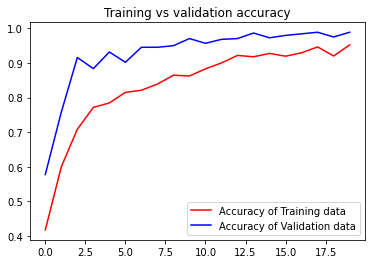

<Figure size 432x288 with 0 Axes>

In [86]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()

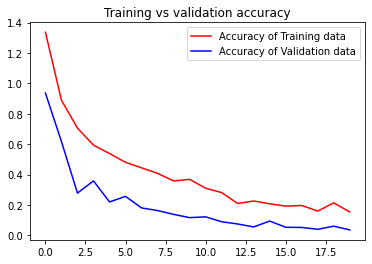

<Figure size 432x288 with 0 Axes>

In [87]:


epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Accuracy of Training data')
plt.plot(epochs, validation_loss, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



In [83]:
data[0].shape

(150, 150, 3)

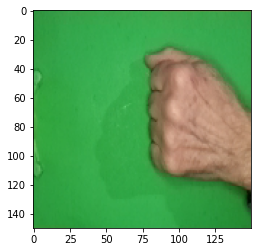

In [120]:
plt.imshow(data[800], cmap="gray")

In [100]:
data[0].shape

(150, 150, 3)

In [121]:
prediction_image=np.array(data[800])
prediction_image= np.expand_dims(prediction_image, axis=0)
prediction = model.predict(prediction_image)
predicted_figure = np.argmax(prediction, axis=1)[0]
predicted_figure

1

In [108]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmptxjrva9h/assets


In [111]:
interpreter = tf.lite.Interpreter('./model.tflite')

In [112]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.allocate_tensors()

In [113]:
print("== Input details ==")
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])
print("\n== Output details ==")
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
shape: [  1 150 150   3]
type: <class 'numpy.float32'>

== Output details ==
shape: [1 3]
type: <class 'numpy.float32'>


In [122]:
prediction_image = np.array(data[800])
prediction_image = np.expand_dims(prediction_image, axis=0)


interpreter.set_tensor(input_details[0]['index'], prediction_image)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])



predicted_figure = np.argmax(output_data, axis=1)[0]
print(predicted_figure)


1
